<a href="https://colab.research.google.com/github/Sufiyan97/Bharat_Intern_Task_1/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
np.random.seed(42)

In [ ]:
stock_symbol = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-01-01'

In [ ]:
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
closing_prices = stock_data['Close'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

In [ ]:
train_size = int(0.8 * len(scaled_prices))
train_data, test_data = scaled_prices[:train_size], scaled_prices[train_size:]


In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
sequence_length = 10
train_sequences, train_labels = create_sequences(train_data, sequence_length)
test_sequences, test_labels = create_sequences(test_data, sequence_length)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(train_sequences, train_labels, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
82/82 - 3s - loss: 0.0047 - 3s/epoch - 36ms/step
Epoch 2/50
82/82 - 1s - loss: 5.4131e-05 - 735ms/epoch - 9ms/step
Epoch 3/50
82/82 - 1s - loss: 4.3324e-05 - 552ms/epoch - 7ms/step
Epoch 4/50
82/82 - 0s - loss: 4.2993e-05 - 459ms/epoch - 6ms/step
Epoch 5/50
82/82 - 0s - loss: 4.1875e-05 - 442ms/epoch - 5ms/step
Epoch 6/50
82/82 - 0s - loss: 4.2955e-05 - 441ms/epoch - 5ms/step
Epoch 7/50
82/82 - 1s - loss: 4.1339e-05 - 518ms/epoch - 6ms/step
Epoch 8/50
82/82 - 0s - loss: 4.4617e-05 - 495ms/epoch - 6ms/step
Epoch 9/50
82/82 - 0s - loss: 4.2749e-05 - 474ms/epoch - 6ms/step
Epoch 10/50
82/82 - 0s - loss: 4.1593e-05 - 433ms/epoch - 5ms/step
Epoch 11/50
82/82 - 0s - loss: 4.2228e-05 - 439ms/epoch - 5ms/step
Epoch 12/50
82/82 - 0s - loss: 4.1300e-05 - 444ms/epoch - 5ms/step
Epoch 13/50
82/82 - 0s - loss: 4.3042e-05 - 436ms/epoch - 5ms/step
Epoch 14/50
82/82 - 0s - loss: 3.9424e-05 - 444ms/epoch - 5ms/step
Epoch 15/50
82/82 - 0s - loss: 3.7130e-05 - 436ms/epoch - 5ms/step
Epoch 16/5

In [ ]:
predictions = model.predict(test_sequences)

21/21 [==============================] - 0s 2ms/step


In [ ]:
predicted_prices = scaler.inverse_transform(predictions)
true_prices = scaler.inverse_transform(test_labels)


In [ ]:
mse = mean_squared_error(true_prices, predicted_prices)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 87.4950035915646


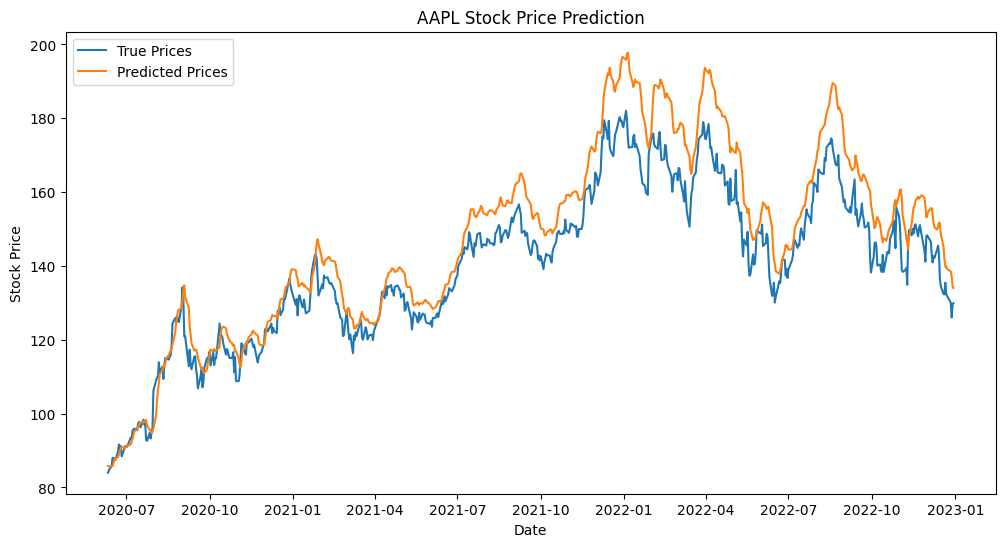

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[train_size+sequence_length:], true_prices, label='True Prices')
plt.plot(stock_data.index[train_size+sequence_length:], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.legend()